#### 1.Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

#### 2.Import the Dataset

In [2]:
df=pd.read_csv('EmployeeAttrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### 3.Checking Null Values

In [5]:
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

#### 4.Data Visualization

(array([588.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 882.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

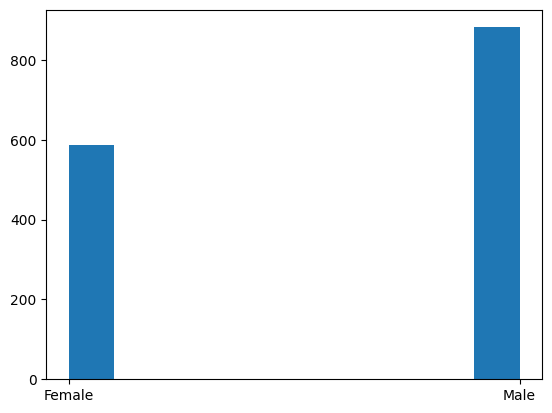

In [7]:
plt.hist(df['Gender'])

C:\Users\PRITAM\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\PRITAM\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\PRITAM\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Attrition', ylabel='Age'>

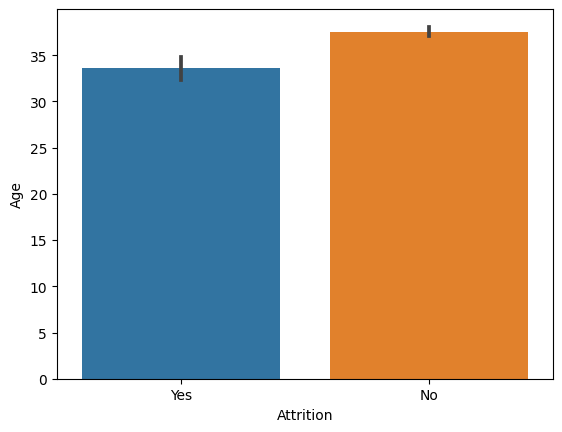

In [8]:
sns.barplot(x='Attrition',y='Age',data=df)

In [9]:
df.shape

(1470, 35)

In [10]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [11]:
df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [12]:
df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [13]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

C:\Users\PRITAM\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\PRITAM\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='DailyRate', ylabel='HourlyRate'>

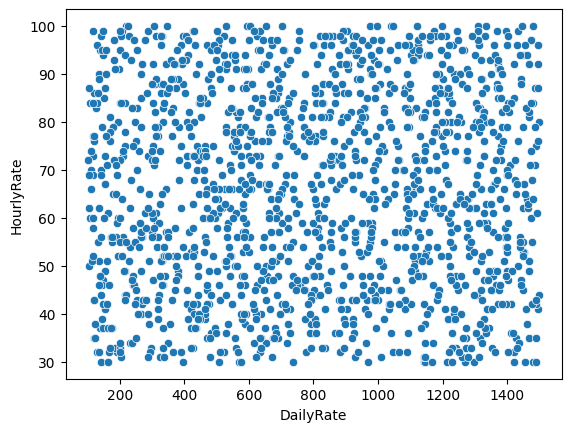

In [14]:
sns.scatterplot(x='DailyRate',y='HourlyRate',data=df)

#### 5.Outlier detection

<Axes: >

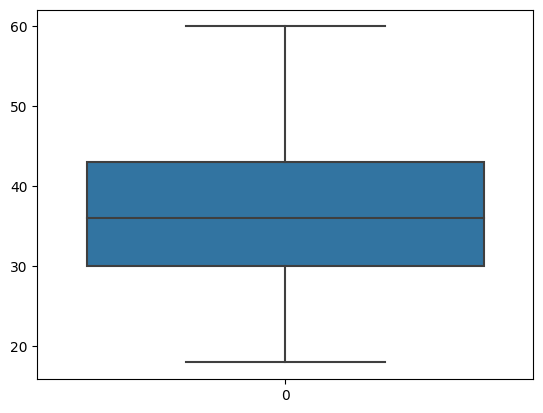

In [15]:
sns.boxplot(df['Age'])

<Axes: >

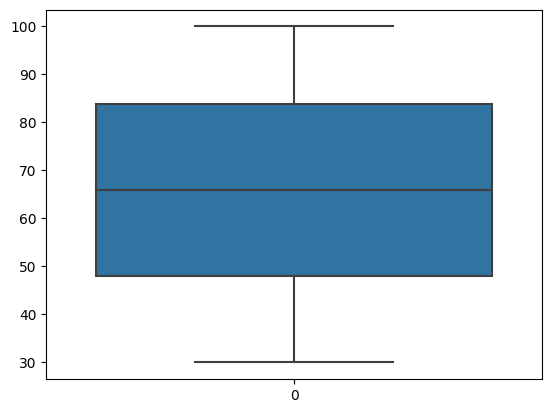

In [16]:
sns.boxplot(df['HourlyRate'])

<Axes: >

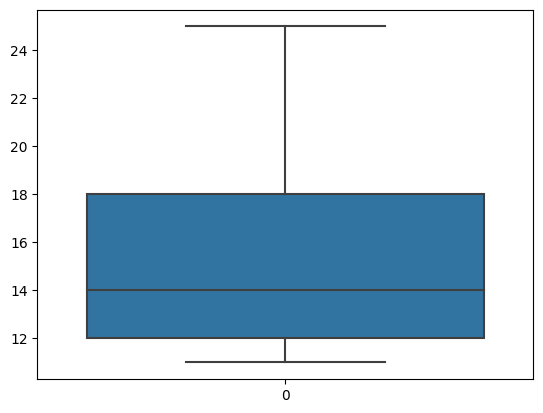

In [17]:
sns.boxplot(df['PercentSalaryHike'])

#### 6.Spliting Dependent and Independent Data

In [18]:
X=df.drop('Attrition',axis=1)
X.shape

(1470, 34)

In [19]:
y=df['Attrition']
y.shape

(1470,)

In [20]:
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2


In [21]:
y.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

#### 7.Encoding of Categorical Data

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeCount             1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [24]:
bus=LabelEncoder()
dept=LabelEncoder()
edu=LabelEncoder()
gen=LabelEncoder()
job=LabelEncoder()
mar=LabelEncoder()
ov18=LabelEncoder()
ovt=LabelEncoder()

In [25]:
X['BusinessTravel']=bus.fit_transform(X['BusinessTravel'])
X['Department']=dept.fit_transform(X['Department'])
X['EducationField']=edu.fit_transform(X['EducationField'])
X['Gender']=gen.fit_transform(X['Gender'])
X['JobRole']=job.fit_transform(X['JobRole'])
X['MaritalStatus']=mar.fit_transform(X['MaritalStatus'])
X['Over18']=ov18.fit_transform(X['Over18'])
X['OverTime']=ovt.fit_transform(X['OverTime'])

In [26]:
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,7,1,...,4,80,1,6,3,3,2,2,2,2


In [27]:
X.tail()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,1,884,1,23,2,3,1,2061,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,2,613,1,6,1,3,1,2062,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,2,155,1,4,3,1,1,2064,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1,1023,2,2,3,3,1,2065,4,...,4,80,0,17,3,2,9,6,0,8
1469,34,2,628,1,8,3,3,1,2068,2,...,1,80,0,6,3,4,4,3,1,2


In [28]:
y.unique()

array(['Yes', 'No'], dtype=object)

In [29]:
X.corr()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010145,0.010146,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
BusinessTravel,0.024751,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015578,0.004174,...,-0.035986,NaN,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,NaN,-0.050990,0.018355,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,-0.010895,-0.019395,...,-0.022414,NaN,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,-0.016075,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,NaN,0.042070,-0.027128,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002516,0.043163,...,-0.004378,NaN,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,NaN,1.000000,0.017621,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,NaN,0.017621,1.000000,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999


<Axes: >

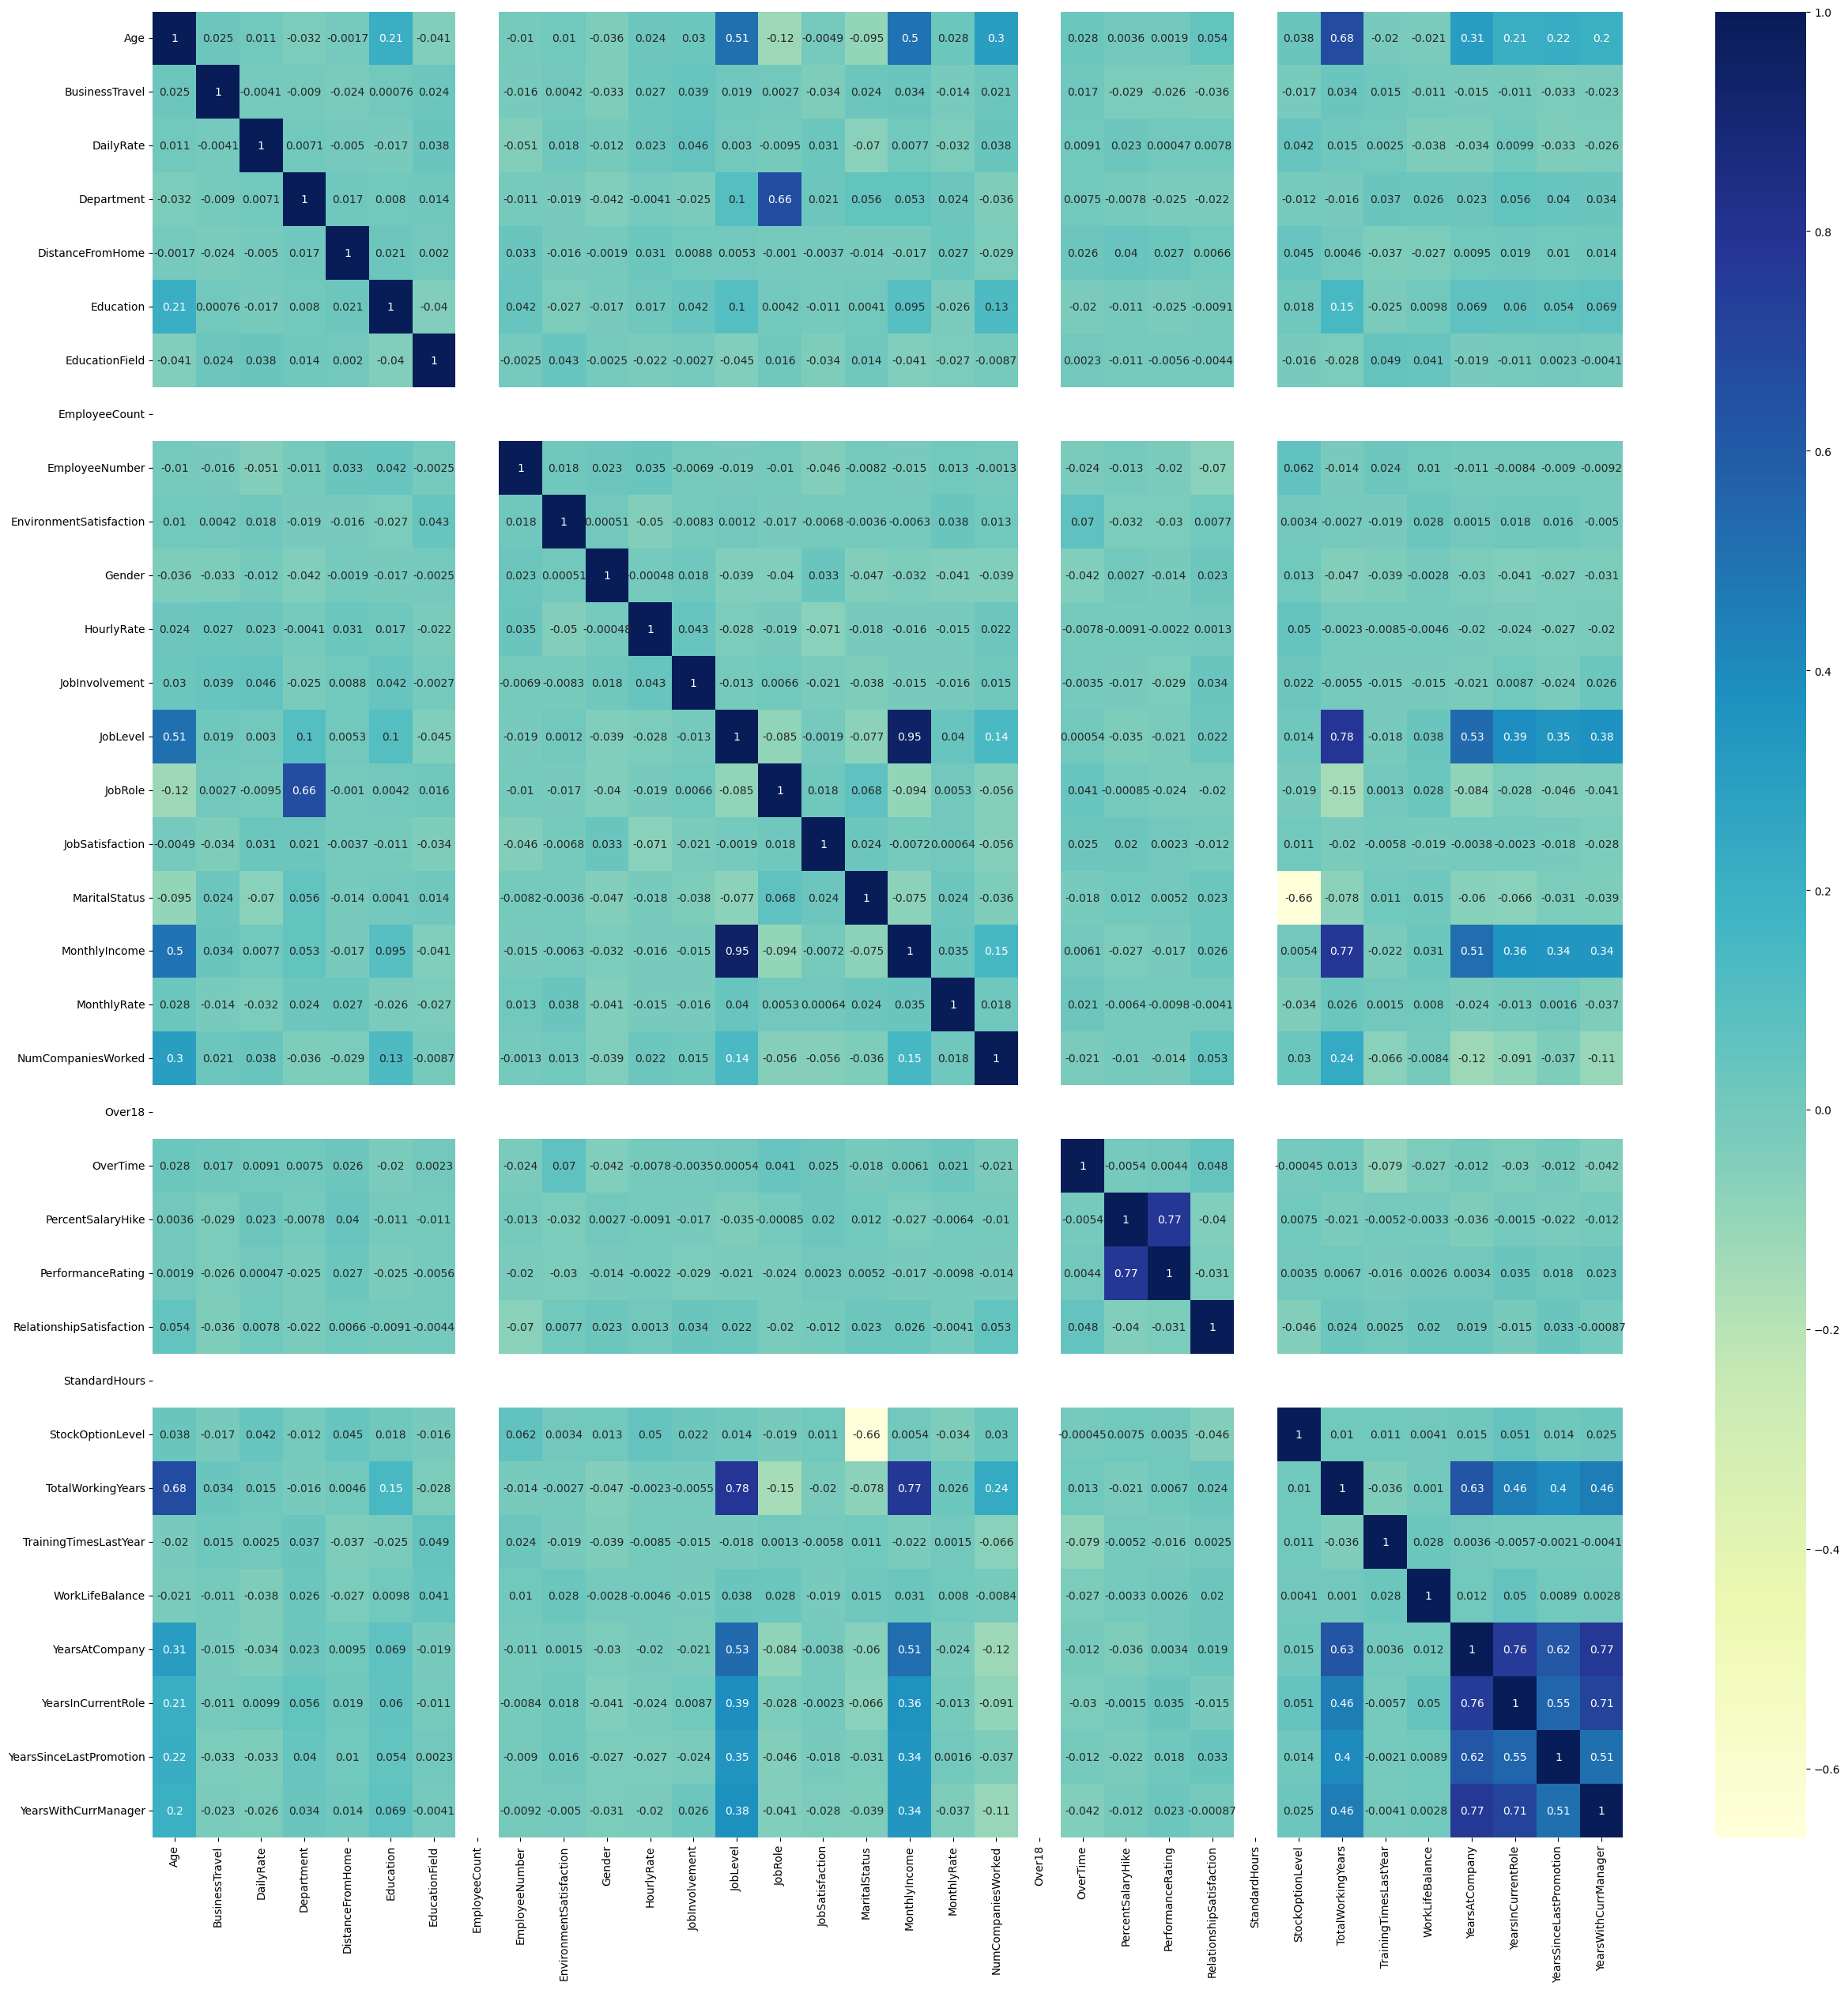

In [30]:
plt.figure(figsize=(30,30))
sns.heatmap(X.corr(),annot=True,cmap='YlGnBu')

#### 8.Feature Scaling

##### Not needed for a Logistic Regression

#### 9.Dividing Data into Training and Testing sets

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape,X_test.shape

((1176, 34), (294, 34))

## Train the Model (Logistic Classification)

In [32]:
model=LogisticRegression()
model.fit(X_train,y_train)

C:\Users\PRITAM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
y_pred=model.predict(X_test)

## Test the Model

In [34]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.84      1.00      0.91       245
         Yes       1.00      0.02      0.04        49

    accuracy                           0.84       294
   macro avg       0.92      0.51      0.48       294
weighted avg       0.86      0.84      0.77       294



<Axes: >

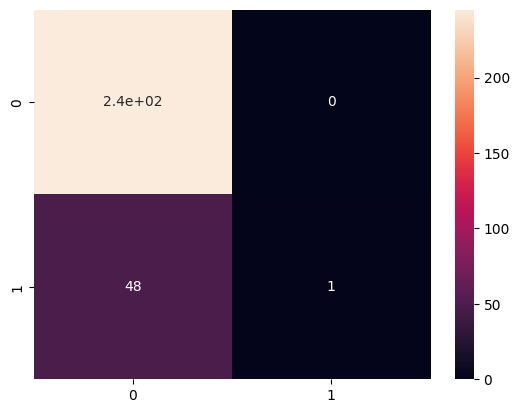

In [36]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8367346938775511

## Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [39]:
y_pred_r=rf.predict(X_test)

In [40]:
accuracy_score(y_test,y_pred_r)

0.8537414965986394

In [41]:
print(classification_report(y_test,y_pred_r))

              precision    recall  f1-score   support

          No       0.86      0.99      0.92       245
         Yes       0.75      0.18      0.30        49

    accuracy                           0.85       294
   macro avg       0.80      0.59      0.61       294
weighted avg       0.84      0.85      0.81       294



In [42]:
cm_r=confusion_matrix(y_test,y_pred_r)

<Axes: >

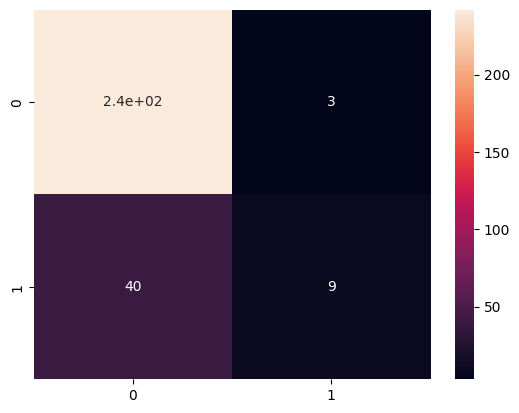

In [43]:
sns.heatmap(cm_r,annot=True)

## K Nearest Neighbors Classifier

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [45]:
y_pred_k=knn.predict(X_test)

In [46]:
accuracy_score(y_test,y_pred_k)

0.7993197278911565

In [47]:
print(classification_report(y_test,y_pred_k))

              precision    recall  f1-score   support

          No       0.83      0.96      0.89       245
         Yes       0.08      0.02      0.03        49

    accuracy                           0.80       294
   macro avg       0.46      0.49      0.46       294
weighted avg       0.71      0.80      0.75       294



In [48]:
cm_k=confusion_matrix(y_test,y_pred_k)

<Axes: >

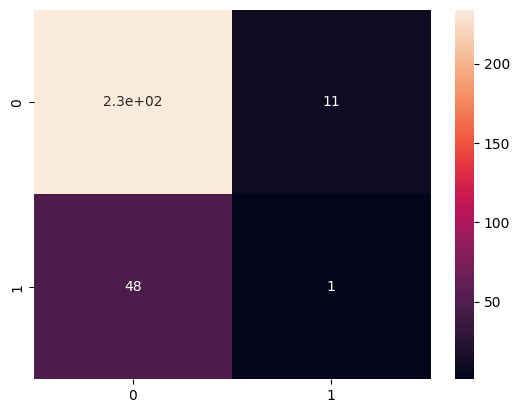

In [49]:
sns.heatmap(cm_k,annot=True)

## Naive Bayes Classifier

In [50]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [51]:
y_pred_n=nb.predict(X_test)

In [52]:
accuracy_score(y_test,y_pred_n)

0.7993197278911565

In [53]:
print(classification_report(y_test,y_pred_n))

              precision    recall  f1-score   support

          No       0.92      0.84      0.87       245
         Yes       0.43      0.61      0.50        49

    accuracy                           0.80       294
   macro avg       0.67      0.72      0.69       294
weighted avg       0.83      0.80      0.81       294



<Axes: >

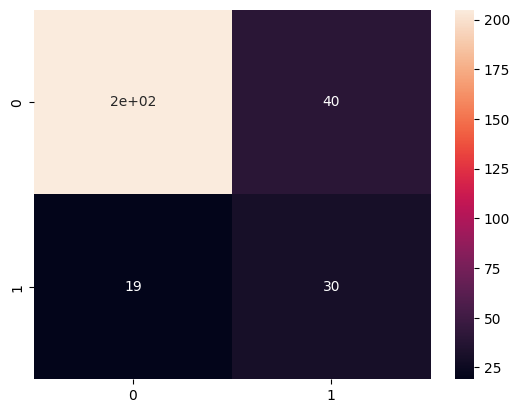

In [54]:
cm_n=confusion_matrix(y_test,y_pred_n)
sns.heatmap(cm_n,annot=True)

### Among the Logistic Regression, Random Forest, K Nearest Neighbors and Naive Bayes Algorithm, Random Forest Classifier has the best Accuracy Score of 85.374 %